# Comparison of Low-Resolution Cicle3 arxiv

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#3-mean-comparison)

5. [The bias between models and observations](#4-calculation-of-a-bias-between-climatological-model-and-observations)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

Running tropical rainfall diagnostic...
Reading configuration yaml file..


### Initialization of the tropical-rainfall diagnostic

The class attributes by default are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=1000**
    
- The left edge of the first bin: **first_edge=0** 
    
- The width of each bin: **width_of_bin=0.05** mm/day

In [4]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, loglevel='warning')

##### Loading the low-resolution arxiv 

In [7]:
%load_ext autoreload
%autoreload 2

In [ ]:
if diag.tools.get_machine()=='lumi':
    reader  = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly") 
    ifs_1990 = reader.retrieve(var=["tprate"])
    
    reader = Reader(model="IFS-NEMO", exp="control-1950-dev", source="lra-r100-monthly")
    control_1950 = reader.retrieve(var=["tprate"])
else:
    reader = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly") 
    ifs_1990 = reader.retrieve(var=["tprate"])
    
    reader = Reader(model="IFS", exp="control-1950-devcon", source="lra-r100-monthly")
    control_1950 = reader.retrieve(var=["tprate"])
    
reader = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep = reader.retrieve(var=["tprate"]) 
mswep_1990 = mswep.sel(time=slice('1980', '2010'))
mswep_1990 = reader.regrid(mswep_1990)

reader = Reader(model="ERA5", exp="era5", source="monthly", regrid = "r100")
era5 = reader.retrieve(var=["tprate"])
era5_1950 = era5.sel(time=slice('1940', '1970'))
era5_1990 = era5.sel(time=slice('1980', '2010'))
era5_1950 = reader.regrid(era5_1950)
era5_1990 = reader.regrid(era5_1990)

#### ICON, ngc3028, lra

In [26]:
lra_data = {
                'ifs_1990': {'data': ifs_1990, 'label': 'ifs_historical-1990'},
                'ifs_1950': {'data': control_1950, 'label': 'ifs_control-1950'},
                'mswep': {'data': mswep_1990, 'label': 'mswep (1980-2010)'},
                'era5_1990': {'data': era5_1990, 'label': 'era5 (1980-2010)'},
                'era5_1950': {'data': era5_1950, 'label': 'era5 (1940-1970)'}        
            }

## 2. Comparison of histograms

##### All output of the diagnostic is in the format of NetCDF or PDF.
##### The paths to the repositories, where the diagnostic store the output, are 

In [7]:
# Please change the path to the NetCDF files and the PDF files to your own path

diag.path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/demo/NetCDF/histograms/"
diag.path_to_mean = "/work/bb1153/b382267/tropical_rainfall_cicle3/demo/NetCDF/mean/"
diag.path_to_pdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/demo/PDF/"

#### The function `histogram` calculates and stores the histograms in a specified repository. 

In [ ]:
histograms = {}

for key, value in lra_data.items():
    histograms[key] = {}
    histograms[key]["data"] = diag.histogram(value["data"],  name_of_file=value["label"])
    histograms[key]["label"] = value["label"]
histograms = diag.tools.add_colors_to_dict(loaded_dict=histograms)

##### The diagnostic can provide us with a graphical comparison of the obtained histograms.  

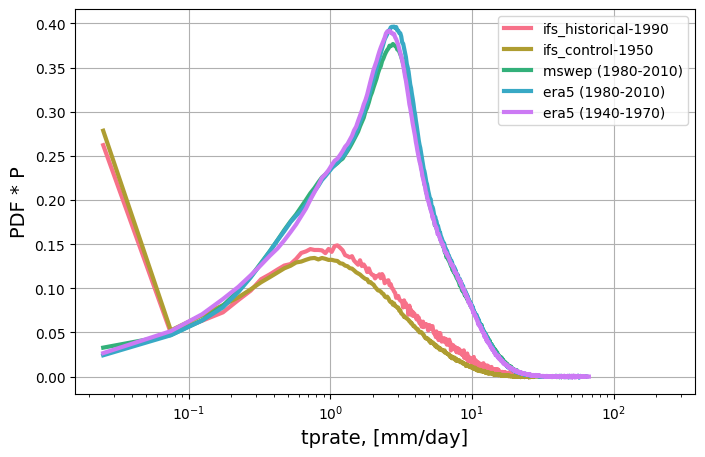

In [28]:
add = None
for key, value in histograms.items():
    add = diag.histogram_plot(value["data"],   add=add, figsize=1, pdfP = True, pdf=False, save=False,
                xlogscale=True, ylogscale=False, color=value["color"], name_of_file= 'lra_comparison',
                legend=value["label"])

## 3. Mean comparison

##### The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `plot_of_average()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `average_into_netcdf(coord='lon')` calculates the mean value of precipitation along the longitude. 

In the end, the mean values of precipitation for each value of latitude in millimeters per day are:

In [ ]:
seasonal_average_lat = {}
 
for key, value in lra_data.items():
    seasonal_average_lat[key] = {}
    seasonal_average_lat[key]["path"] = diag.average_into_netcdf(value["data"], path_to_netcdf=diag.path_to_netcdf+'mean/', name_of_file=value["label"])
    seasonal_average_lat[key]["label"] = value["label"]
seasonal_average_lat = diag.tools.update_dict_of_loaded_analyses(loaded_dict=seasonal_average_lat)

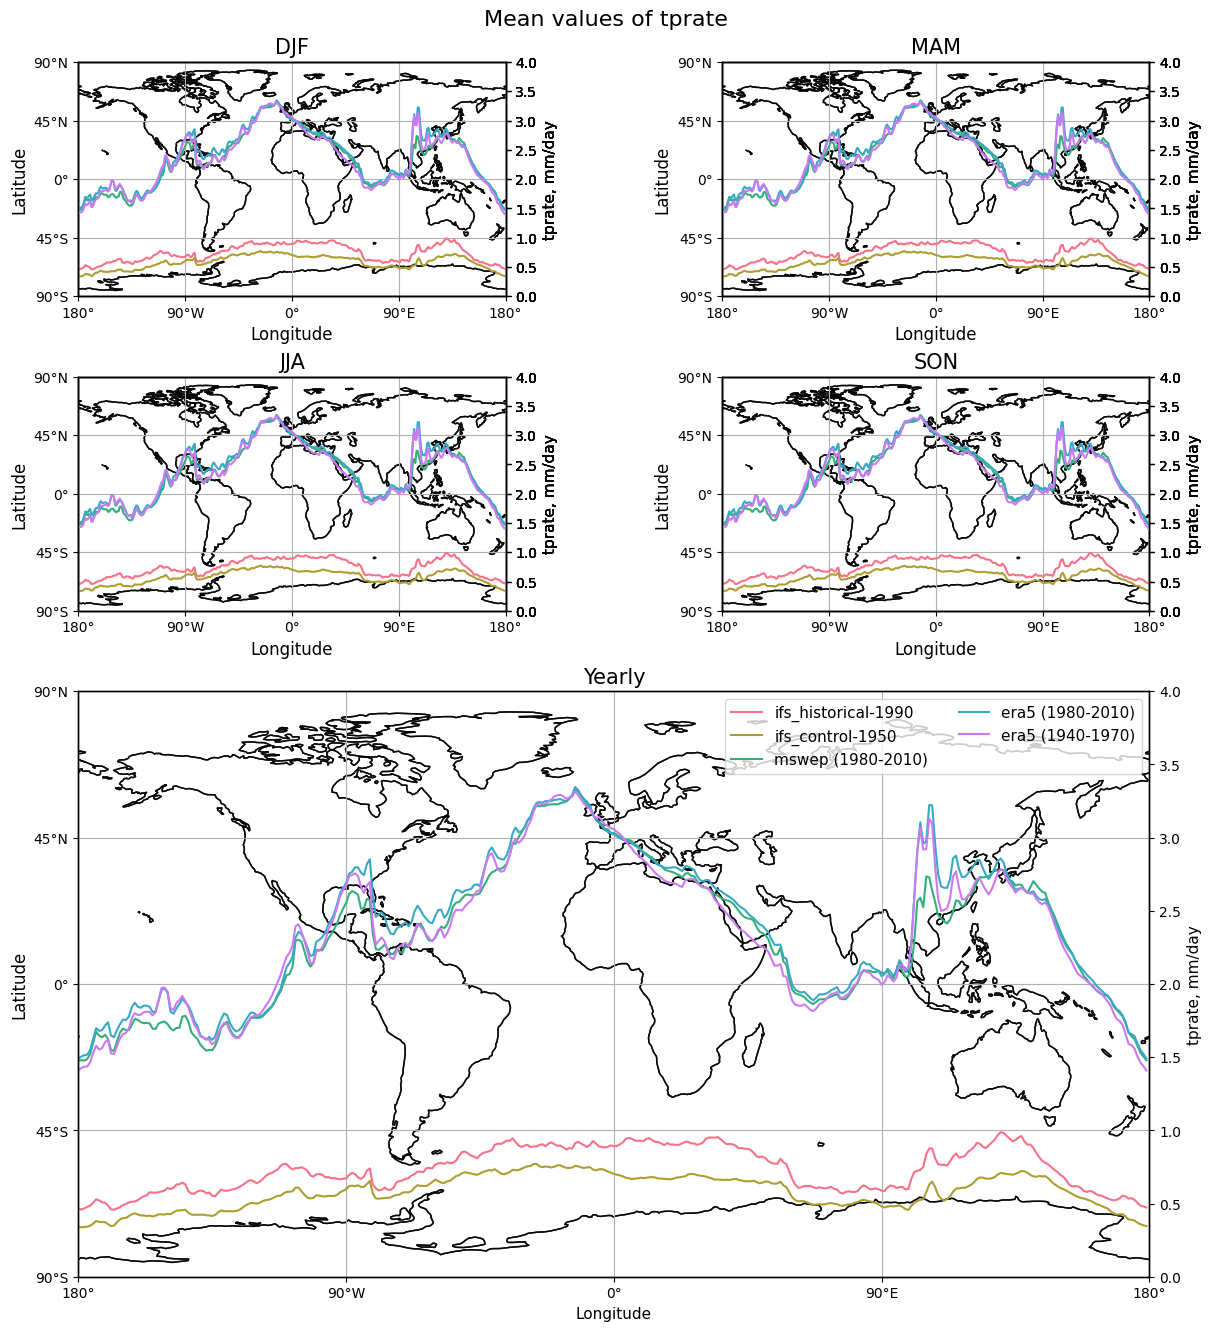

In [40]:
fig, add = None, None
for key, value in seasonal_average_lat.items(): 
    add = diag.plot_of_average(path_to_netcdf=value["path"], trop_lat=90, ymax=4, fig=add, figsize=1.2,
                               color=value["color"], legend=value["label"],
                               save=False, name_of_file= 'lra_comparison')

In [ ]:
seasonal_average_lon = {}

for key, value in lra_data.items():
    seasonal_average_lon[key] = {}
    seasonal_average_lon[key]["path"] = diag.average_into_netcdf(value["data"], coord='lon', trop_lat=90, path_to_netcdf=diag.path_to_netcdf+'mean/', 
                                                                 name_of_file=value["label"])
    seasonal_average_lon[key]["label"] = value["label"]

seasonal_average_lon = diag.tools.update_dict_of_loaded_analyses(loaded_dict=seasonal_average_lon)

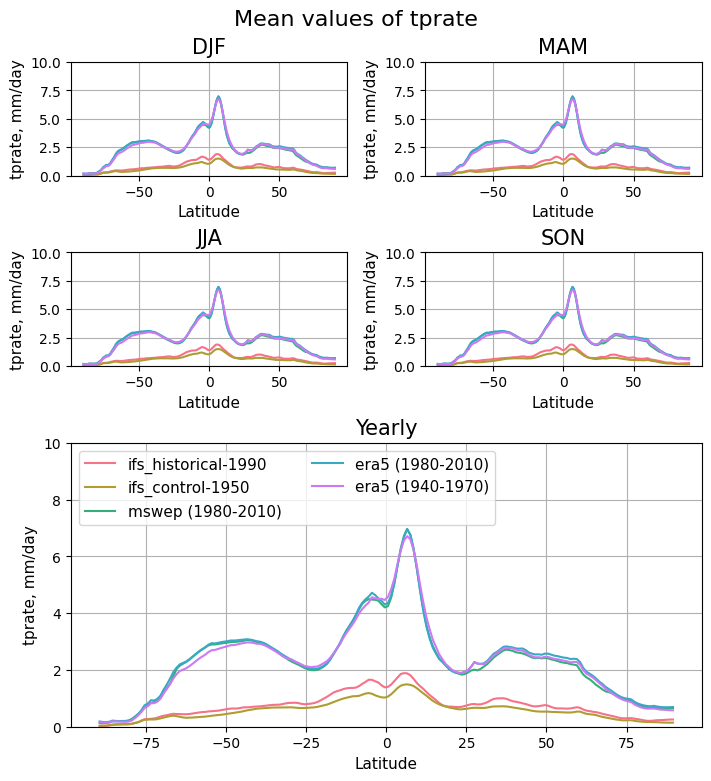

In [42]:
fig, add = None, None
for key, value in seasonal_average_lon.items():
    add = diag.plot_of_average(data=value["data"],   fig=add, figsize=0.7, ymax=10, save=False,
                color=value["color"], loc='upper left', name_of_file= 'lra_comparison',
                legend=value["label"])

## 4. Calculation of a bias between climatological model and observations

Tropical-rainfall diagnostic provides the graphical representation of the bias between the mean value of precipitation of the climatological model and the mean value of observations. 

The mean value the function calculates for each season (`DJF`, `MAM`, `JJA`, `SON`) and for the total period of time. 

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(


/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/sparse/_coo/core.py:215: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(


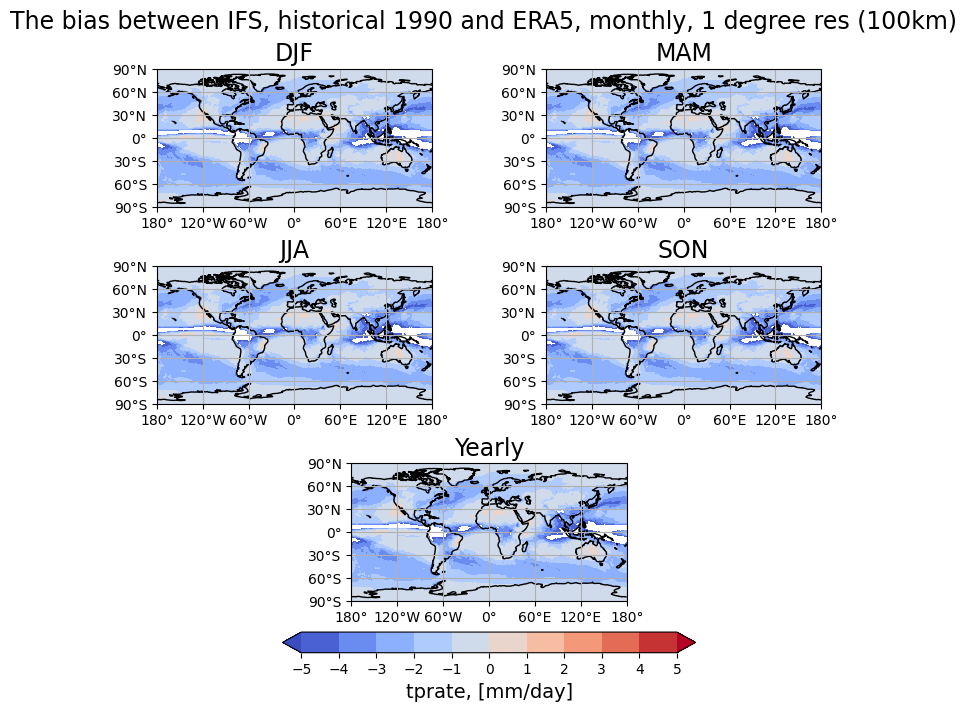

In [33]:
diag.plot_bias(lra_data['ifs_1990']["data"], dataset_2 = lra_data['era5_1990']["data"], seasons_bool=True, trop_lat=90,  
               vmin=-5, vmax=5, save=False,
               plot_title='The bias between IFS, historical 1990 and ERA5, monthly, 1 degree res (100km)', 
               name_of_file=lra_data['ifs_1990']["label"]+'_'+lra_data['era5_1990']['label']) 

#

In [ ]:
P95_level = {}
for key, value in lra_data.items():
    P95_level[key] = diag.get_95percent_level(value["data"])

##### The end